In [7]:
# Check RDKit
try:
    from rdkit import Chem
    print("RDKit successfully imported!")
except ImportError:
    print("RDKit import failed!")

# Check Chemprop
try:
    import chemprop
    print("Chemprop successfully imported!")
except ImportError:
    print("Chemprop import failed!")

# Check torch (PyTorch)
try:
    import torch
    print("PyTorch successfully imported!")
except ImportError:
    print("PyTorch import failed!")
# For handling arrays and scientific computation
import numpy as np
import pandas as pd

# For numerical operations and handling mathematical functions
import math
from scipy import stats

# For handling time-related data
import datetime
import time

# For handling arrays and matrices
import numpy.matlib


RDKit successfully imported!
Chemprop successfully imported!
PyTorch successfully imported!


In [8]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'chemprop_data.csv'
df = pd.read_csv(file_path)

# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Handle missing (NaN) values
# Option 1: Remove rows with NaN values
df = df.dropna()

# Option 2: Fill NaN values with the median of each column
#df = df.fillna(df.median())

# Step 4: Save the cleaned dataset to a new file
cleaned_file_path = 'chemprop_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

# Step 5: Verify the cleaned dataset
print(f"Dataset saved to: {cleaned_file_path}")
print("Missing values in each column after cleaning:")
print(df.isna().sum())  # Check for NaN values
print("Number of duplicate rows after cleaning:")
print(df.duplicated().sum())  # Check for duplicates


Dataset saved to: chemprop_data_cleaned.csv
Missing values in each column after cleaning:
SMILES    0
pIC50     0
dtype: int64
Number of duplicate rows after cleaning:
0


In [ ]:
##approach one without descriptors-chemprop model is where the model is

In [3]:
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe with SMILES and pIC50 columns
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the training and testing sets to CSV files
train_df[['SMILES', 'pIC50']].to_csv('train_data_wod.csv', index=False)
test_df[['SMILES', 'pIC50']].to_csv('test_data_wod.csv', index=False)


In [5]:
!chemprop_train \
    --data_path train_data_wod.csv \
    --save_dir chemprop_model \
    --target_columns pIC50 \
    --dataset_type regression \
    --epochs 50 \
    --num_workers 16 \
    --batch_size 64 \
    --gpu 0 \
    --dropout 0.2


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Command line
python /home/rachana/.local/bin/chemprop_train --data_path train_data_wod.csv --save_dir chemprop_model --target_columns pIC50 --dataset_type regression --epochs 50 --num_workers 16 --batch_size 64 --gpu 0 --dropout 0.2
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 64,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bo

In [6]:
!chemprop_predict --test_path test_data_wod.csv --checkpoint_dir chemprop_model --preds_path chemprop_predictions.csv

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [7]:
import pandas as pd

# Load the predictions file
predictions_df = pd.read_csv('chemprop_predictions.csv')

# Display the first few rows to understand the structure
#print(predictions_df.head())
# Merge predictions with the test data
merged_df = pd.merge(test_df, predictions_df, on="SMILES")

# Display the first few rows to verify
print(merged_df.head())


                                              SMILES   pIC50_x   pIC50_y
0  COc1ccc(cc1)S(=O)(=O)Nc1cccc2c1O[C@@H](CN(C)S(...  6.019828  5.975338
1  C[C@@H]1CCCCO[C@@H](CN(C)C(=O)c2ccncc2)[C@@H](...  5.887490  6.001671
2  O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)cc-2oc2c([Hg]...  6.335297  6.189622
3                 CCOC(=O)[C@@](C)(N)Cc1ccc(c(c1)O)O  5.889669  6.021796
4  Cc1cc(cc2sc(nc12)N(Cc1ccccn1)C(=O)c1ccc(cc1)S(...  6.005561  6.034284


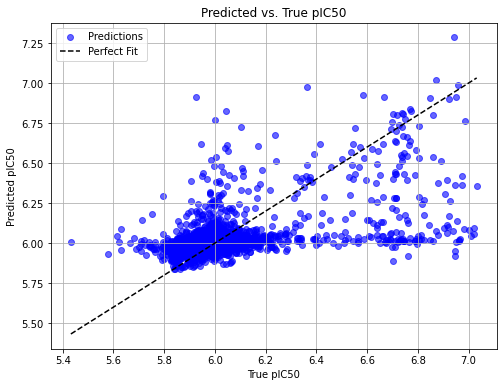

In [8]:
import matplotlib.pyplot as plt

# Plotting Predicted vs True pIC50
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['pIC50_x'], merged_df['pIC50_y'], alpha=0.6, color='blue', label='Predictions')
plt.plot([merged_df['pIC50_x'].min(), merged_df['pIC50_x'].max()],
         [merged_df['pIC50_x'].min(), merged_df['pIC50_x'].max()], 'k--', label='Perfect Fit')
plt.xlabel('True pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Predicted vs. True pIC50')
plt.legend()
plt.grid(True)
plt.show()


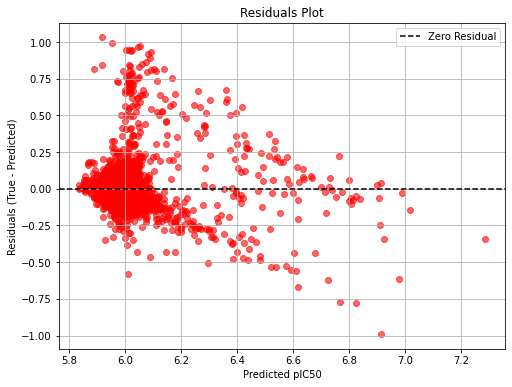

In [9]:
# Calculate residuals (True - Predicted)
merged_df['residuals'] = merged_df['pIC50_x'] - merged_df['pIC50_y']

# Plotting Residuals
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['pIC50_y'], merged_df['residuals'], alpha=0.6, color='red')
plt.axhline(0, linestyle='--', color='black', label='Zero Residual')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals (True - Predicted)')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


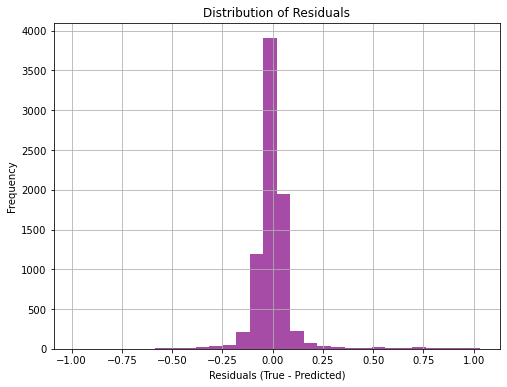

In [10]:
# Plotting Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(merged_df['residuals'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Residuals (True - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


In [ ]:
#approach 2 with pca - model_output is where the model is

In [16]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

# Step 1: Load the dataset
file_path = 'chemprop_data.csv'
df = pd.read_csv(file_path)

# Step 2: Remove duplicate rows
df = df.drop_duplicates()

# Step 3: Handle missing (NaN) values by dropping them
df = df.dropna()

# Step 4: Define the required descriptors
required_descriptors = [
    'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
    'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2',
    'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9',
    'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha',
    'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex',
    'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge',
    'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
    'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles',
    'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
    'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
    'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
    'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9',
    'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7',
    'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3',
    'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1',
    'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7',
    'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N',
    'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine',
    'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH',
    'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline',
    'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo',
    'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine',
    'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss',
    'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom',
    'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol',
    'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide',
    'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
    'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed'
]

# Step 5: Create a descriptor calculator
descriptor_calculator = MolecularDescriptorCalculator(required_descriptors)

# Step 6: Function to calculate descriptors for each molecule
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [np.nan] * len(required_descriptors)  # Return NaN if molecule is invalid
    return descriptor_calculator.CalcDescriptors(mol)

# Step 7: Function to process each SMILES string and handle errors
def process_smiles(smiles):
    if isinstance(smiles, str) and smiles.strip():  # Check if SMILES is a non-empty string
        try:
            return calculate_descriptors(smiles)
        except Exception as e:
            print(f"Error processing SMILES '{smiles}': {e}")
            return [np.nan] * len(required_descriptors)
    else:
        return [np.nan] * len(required_descriptors)

# Step 8: Apply the descriptor calculation function to all SMILES entries
descriptors_df = df['SMILES'].apply(process_smiles).apply(pd.Series)

# Step 9: Assign proper column names to the descriptor DataFrame
descriptors_df.columns = required_descriptors

# Step 10: Concatenate the descriptors with the original DataFrame
df = pd.concat([df, descriptors_df], axis=1)

# Step 11: Drop rows with NaN values (any row that has NaN in any of the descriptors will be dropped)
df = df.dropna()

# Step 12: Save the cleaned and descriptor-enriched dataset
cleaned_with_descriptors_file_path = 'chemprop_data_cleaned_with_descriptors.csv'
df.to_csv(cleaned_with_descriptors_file_path, index=False)

# Step 13: Verify the new dataset
print(f"Dataset with descriptors saved to: {cleaned_with_descriptors_file_path}")
print(df.head())


[21:54:01] Unusual charge on atom 0 number of radical electrons set to zero
[21:54:01] Unusual charge on atom 0 number of radical electrons set to zero


Dataset with descriptors saved to: chemprop_data_cleaned_with_descriptors.csv
                                              SMILES     pIC50  BalabanJ  \
0                   Nc1nnc(o1)-c1ccc(o1)[N+](=O)[O-]  7.050734  2.378937   
1  O[C@H]1COC[C@@H]2O[C@H](CC[C@H]2N(C1)C(=O)Nc1c...  7.042751  1.330937   
2  CC(C)C[C@@H](N)C(=O)N[C@@H]1[C@H](O)c2ccc(c(c2...  7.038310  1.239345   
3            [O-][N+](=O)c1ccc(o1)/C=N/N1CC(=O)NC1=O  7.033676  2.070288   
4  Cn1cnc(c1)CCNC(=O)C[C@@H]1CC[C@@H]2[C@H](COC[C...  7.032146  1.329559   

       BertzCT       Chi0      Chi0n      Chi0v       Chi1      Chi1n  \
0   473.639813  10.129392   6.706685   6.706685   6.664704   3.501824   
1  1070.803321  27.122745  20.693585  20.693585  18.185692  12.505447   
2  4055.015919  72.832158  53.401877  54.913735  47.118156  31.165890   
3   519.740144  12.413849   8.322040   8.322040   8.058551   4.456197   
4  1093.803293  27.285882  20.986098  20.986098  18.079539  12.479125   

       Chi1v  ...  fr_sulf

In [19]:
print(df.columns)


Index(['SMILES', 'pIC50', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v',
       'Chi1', 'Chi1n', 'Chi1v',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'qed'],
      dtype='object', length=202)


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = 'chemprop_data_cleaned_with_descriptors.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop the 'SMILES' and 'pIC50' columns, assuming they are in the dataset
df_cleaned = df.drop(columns=['SMILES', 'pIC50'])

# Drop columns with non-numeric data (if any remain)
df_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Replace infinity values with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_cleaned = df_cleaned.dropna()

# Check if there are still any NaN or inf values
if np.any(np.isnan(df_cleaned)) or np.any(np.isinf(df_cleaned)):
    print("There are still NaN or inf values in the dataset.")
else:
    print("No NaN or inf values in the dataset.")

# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Perform PCA
pca = PCA(n_components=2)  # Choose 2 components for visualization (can adjust as needed)
X_pca = pca.fit_transform(df_scaled)

# Convert PCA result into a DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Concatenate PCA results with the original dataset (including 'SMILES' and 'pIC50')
df_cleaned = pd.concat([df[['SMILES', 'pIC50']], pca_df], axis=1)

# Save the PCA result to a new CSV file
pca_cleaned_file_path = 'pca_result_with_target_scaled.csv'
df_cleaned.to_csv(pca_cleaned_file_path, index=False)

# Print the result file path and preview
print(f"PCA results saved to: {pca_cleaned_file_path}")
print(df_cleaned.head())


No NaN or inf values in the dataset.
PCA results saved to: pca_result_with_target_scaled.csv
                                              SMILES     pIC50       PCA1  \
0                   Nc1nnc(o1)-c1ccc(o1)[N+](=O)[O-]  7.050734 -12.263253   
1  O[C@H]1COC[C@@H]2O[C@H](CC[C@H]2N(C1)C(=O)Nc1c...  7.042751   0.357965   
2  CC(C)C[C@@H](N)C(=O)N[C@@H]1[C@H](O)c2ccc(c(c2...  7.038310  36.097484   
3            [O-][N+](=O)c1ccc(o1)/C=N/N1CC(=O)NC1=O  7.033676 -10.305385   
4  Cn1cnc(c1)CCNC(=O)C[C@@H]1CC[C@@H]2[C@H](COC[C...  7.032146   0.486937   

        PCA2  
0   0.118237  
1  -2.189217  
2 -22.872016  
3  -2.070955  
4  -3.009319  


In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset with PCA results and pIC50 values
df = pd.read_csv('pca_result_with_target_scaled.csv')

# Define features (X) and target (y)
X = df.drop(columns=['SMILES', 'pIC50'])  # Drop SMILES and pIC50, as they are not features
y = df['pIC50']  # Target variable (pIC50)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the split data to CSV (optional)
X_train['pIC50'] = y_train
X_test['pIC50'] = y_test
X_train.to_csv('train_data.csv', index=False)
X_test.to_csv('test_data.csv', index=False)


In [23]:
# Convert training data to Chemprop format
train_data = X_train.copy()
train_data['SMILES'] = df.loc[X_train.index, 'SMILES']
train_data = train_data[['SMILES', 'pIC50']]
train_data.to_csv('train.csv', index=False)

# Convert test data to Chemprop format
test_data = X_test.copy()
test_data['SMILES'] = df.loc[X_test.index, 'SMILES']
test_data = test_data[['SMILES', 'pIC50']]
test_data.to_csv('test.csv', index=False)


In [11]:
!chemprop_train --data_path train.csv --save_dir model_output --epochs 50 --batch_size 64 --hidden_size 300 --dropout 0.2 --dataset_type regression --num_workers 16 --gpu 0


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Command line
python /home/rachana/.local/bin/chemprop_train --data_path train.csv --save_dir model_output --epochs 50 --batch_size 64 --hidden_size 300 --dropout 0.2 --dataset_type regression --num_workers 16 --gpu 0
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 64,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_s

In [17]:
!chemprop_predict \
    --test_path test.csv \
    --checkpoint_dir /data/rachana/I50P/model_output/fold_0/model_0 \
    --preds_path chemprop_predictions_with_descriptors_testpca.csv


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [18]:
!chemprop_predict \
    --test_path train.csv \
    --checkpoint_dir /data/rachana/I50P/model_output/fold_0/model_0 \
    --preds_path chemprop_predictions_with_descriptors_trainpca.csv


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [19]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load datasets (replace 'file_path' with your actual file paths)
training_data = pd.read_csv('train.csv')  # File with true training pIC50 values
test_data = pd.read_csv('test.csv')  # File with true test pIC50 values
test_predictions = pd.read_csv('chemprop_predictions_with_descriptors_testpca.csv')  # File with training predictions
training_predictions = pd.read_csv('chemprop_predictions_with_descriptors_trainpca.csv')  # File with test predictions

# Merge datasets on SMILES, retaining only common rows
train_merged = pd.merge(
    training_data, training_predictions, on='SMILES', suffixes=('_true', '_pred_train'), how='inner'
)
test_merged = pd.merge(
    test_data, test_predictions, on='SMILES', suffixes=('_true', '_pred_test'), how='inner'
)

# Check for unmatched SMILES
unmatched_smiles_train = set(training_data['SMILES']) - set(training_predictions['SMILES'])
unmatched_smiles_test = set(test_data['SMILES']) - set(test_predictions['SMILES'])

print(f"Unmatched SMILES in Training Set: {len(unmatched_smiles_train)}")
print(f"Unmatched SMILES in Test Set: {len(unmatched_smiles_test)}")

# Extract true and predicted pIC50 values
# Training set
true_values_train = train_merged['pIC50_true']
train_predictions = train_merged['pIC50_pred_train']

# Test set
true_values_test = test_merged['pIC50_true']
test_predictions = test_merged['pIC50_pred_test']

# Calculate metrics for Training Set
rmse_train = np.sqrt(mean_squared_error(true_values_train, train_predictions))
r2_train = r2_score(true_values_train, train_predictions)

# Calculate metrics for Test Set
rmse_test = np.sqrt(mean_squared_error(true_values_test, test_predictions))
r2_test = r2_score(true_values_test, test_predictions)

# Print the results
print("\nTraining Set Metrics:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R^2: {r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R^2: {r2_test:.4f}")

# Save merged datasets with metrics (optional)
train_merged.to_csv('train_comparison_only89.csv', index=False)
test_merged.to_csv('test_comparison_only89.csv', index=False)


Unmatched SMILES in Training Set: 0
Unmatched SMILES in Test Set: 0

Training Set Metrics:
RMSE: 0.0861
R^2: 0.5381

Test Set Metrics:
RMSE: 0.1050
R^2: 0.3401


In [16]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load datasets (replace 'file_path' with your actual file paths)
training_data = pd.read_csv('test_data_wod.csv')  # File with true pIC50 values
method1_data = pd.read_csv('chemprop_predictions.csv')  # File with predictions (no descriptors)
method2_data = pd.read_csv('chemprop_predictions_with_descriptors.csv')  # File with predictions and descriptors

# Merge datasets on SMILES, retaining only common rows
method1_merged = pd.merge(
    training_data, method1_data, on='SMILES', suffixes=('_true', '_method1'), how='inner'
)
method2_merged = pd.merge(
    training_data, method2_data, on='SMILES', suffixes=('_true', '_method2'), how='inner'
)

# Check for unmatched SMILES
unmatched_smiles_method1 = set(training_data['SMILES']) - set(method1_data['SMILES'])
unmatched_smiles_method2 = set(training_data['SMILES']) - set(method2_data['SMILES'])

print(f"Unmatched SMILES in Method 1: {len(unmatched_smiles_method1)}")
print(f"Unmatched SMILES in Method 2: {len(unmatched_smiles_method2)}")

# Extract true and predicted pIC50 values
true_values_method1 = method1_merged['pIC50_true']
method1_predictions = method1_merged['pIC50_method1']

true_values_method2 = method2_merged['pIC50_true']
method2_predictions = method2_merged['pIC50_method2']

# Calculate metrics for Method 1
rmse_method1 = np.sqrt(mean_squared_error(true_values_method1, method1_predictions))
r2_method1 = r2_score(true_values_method1, method1_predictions)

# Calculate metrics for Method 2
rmse_method2 = np.sqrt(mean_squared_error(true_values_method2, method2_predictions))
r2_method2 = r2_score(true_values_method2, method2_predictions)

# Print the results
print("Method 1 (No Descriptors):")
print(f"RMSE: {rmse_method1:.4f}")
print(f"R^2: {r2_method1:.4f}\n")

print("Method 2 (With Descriptors):")
print(f"RMSE: {rmse_method2:.4f}")
print(f"R^2: {r2_method2:.4f}\n")

# Save merged datasets with metrics (optional)
method1_merged.to_csv('method1_comparison.csv', index=False)
method2_merged.to_csv('method2_comparison.csv', index=False)


Unmatched SMILES in Method 1: 0
Unmatched SMILES in Method 2: 0
Method 1 (No Descriptors):
RMSE: 0.1092
R^2: 0.2972

Method 2 (With Descriptors):
RMSE: 0.0930
R^2: 0.4901



In [18]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.2 MB/s eta 0:00:00a 0:00:01


/tmp/ipykernel_2739921/1176903454.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='RMSE', data=metrics_df, ax=ax[0], palette='Blues')
/tmp/ipykernel_2739921/1176903454.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Method', y='R^2', data=metrics_df, ax=ax[1], palette='Greens')


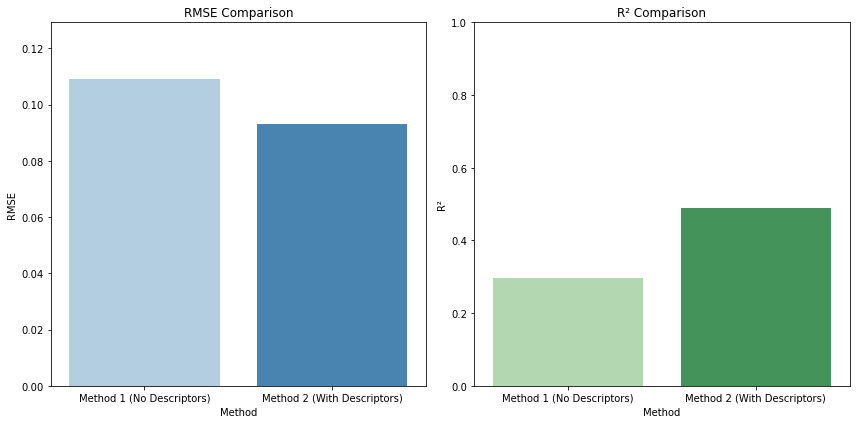

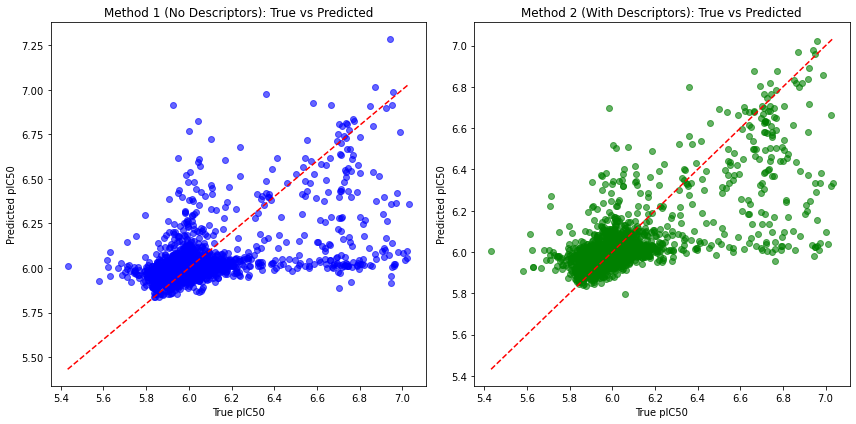

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for RMSE and R² values
metrics = {
    'Method': ['Method 1 (No Descriptors)', 'Method 2 (With Descriptors)'],
    'RMSE': [0.1092, 0.0930],
    'R^2': [0.2972, 0.4901]
}

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Set up the figure and axis for the RMSE and R² comparison bar plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# RMSE Bar Plot
sns.barplot(x='Method', y='RMSE', data=metrics_df, ax=ax[0], palette='Blues')
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim(0, max(metrics_df['RMSE']) + 0.02)

# R² Bar Plot
sns.barplot(x='Method', y='R^2', data=metrics_df, ax=ax[1], palette='Greens')
ax[1].set_title('R² Comparison')
ax[1].set_ylabel('R²')
ax[1].set_ylim(0, 1)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Scatter Plots: True vs Predicted pIC50 for both methods
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Method 1 Scatter Plot
ax[0].scatter(true_values_method1, method1_predictions, color='blue', alpha=0.6)
ax[0].plot([min(true_values_method1), max(true_values_method1)], 
           [min(true_values_method1), max(true_values_method1)], color='red', linestyle='--')
ax[0].set_title('Method 1 (No Descriptors): True vs Predicted')
ax[0].set_xlabel('True pIC50')
ax[0].set_ylabel('Predicted pIC50')

# Method 2 Scatter Plot
ax[1].scatter(true_values_method2, method2_predictions, color='green', alpha=0.6)
ax[1].plot([min(true_values_method2), max(true_values_method2)], 
           [min(true_values_method2), max(true_values_method2)], color='red', linestyle='--')
ax[1].set_title('Method 2 (With Descriptors): True vs Predicted')
ax[1].set_xlabel('True pIC50')
ax[1].set_ylabel('Predicted pIC50')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


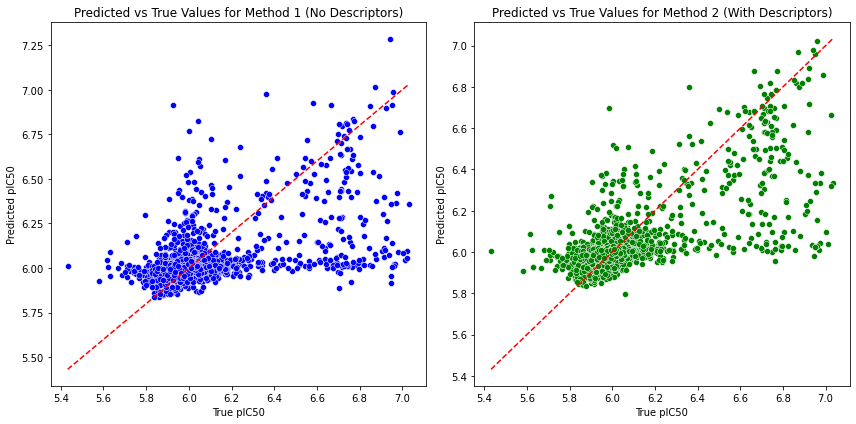

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure you're reading the data correctly
training_data = pd.read_csv('test_data_wod.csv')  # Replace with your actual file path
method1_data = pd.read_csv('chemprop_predictions.csv')  # Replace with your actual file path
method2_data = pd.read_csv('chemprop_predictions_with_descriptors.csv')  # Replace with your actual file path

# Merge datasets on SMILES
method1_merged = pd.merge(
    training_data, method1_data, on='SMILES', suffixes=('_true', '_method1'), how='inner'
)
method2_merged = pd.merge(
    training_data, method2_data, on='SMILES', suffixes=('_true', '_method2'), how='inner'
)

# Extract true and predicted pIC50 values for both methods
true_values_method1 = method1_merged['pIC50_true'].values
method1_predictions = method1_merged['pIC50_method1'].values

true_values_method2 = method2_merged['pIC50_true'].values
method2_predictions = method2_merged['pIC50_method2'].values

# Plot Predicted vs True Values
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Method 1 (No Descriptors)
sns.scatterplot(x=true_values_method1, y=method1_predictions, color='blue', ax=ax[0])
ax[0].plot([min(true_values_method1), max(true_values_method1)], 
           [min(true_values_method1), max(true_values_method1)], 
           color='red', linestyle='--')  # Diagonal line
ax[0].set_title('Predicted vs True Values for Method 1 (No Descriptors)')
ax[0].set_xlabel('True pIC50')
ax[0].set_ylabel('Predicted pIC50')

# Method 2 (With Descriptors)
sns.scatterplot(x=true_values_method2, y=method2_predictions, color='green', ax=ax[1])
ax[1].plot([min(true_values_method2), max(true_values_method2)], 
           [min(true_values_method2), max(true_values_method2)], 
           color='red', linestyle='--')  # Diagonal line
ax[1].set_title('Predicted vs True Values for Method 2 (With Descriptors)')
ax[1].set_xlabel('True pIC50')
ax[1].set_ylabel('Predicted pIC50')

plt.tight_layout()
plt.show()


In [ ]:
################### 

In [1]:
!pip install tensorboard


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
##########

In [ ]:
######PARTIAL LEAST SQUARE METHOD##########33- model saved at model_output_pls

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

# Load the dataset
df = pd.read_csv("chemprop_data_cleaned_with_descriptors.csv")

# Separate features (X) and target (y)
X = df.drop(columns=["pIC50", "SMILES"])  # Drop SMILES and target columns
y = df["pIC50"]
smiles = df["SMILES"]  # Store SMILES separately

# Step 1: Handle Inf and NaN
print("Number of infinite values in X:", np.isinf(X).sum().sum())

X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace Inf/-Inf
X = X.dropna()  # Drop NaNs
y = y.loc[X.index]  # Align y with cleaned X
smiles = smiles.loc[X.index]  # Align SMILES with cleaned X

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test, smiles_train, smiles_test = train_test_split(
    X_scaled, y, smiles, test_size=0.2, random_state=42
)

# Step 4: Apply PLS
n_components = 20  # Adjust number of components
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)

# Transform data
X_train_pls = pls.transform(X_train)
X_test_pls = pls.transform(X_test)

# Check results
print("PLS Components (Train):", X_train_pls.shape)
print("PLS Components (Test):", X_test_pls.shape)

# Convert transformed data into DataFrames
train_pls = pd.DataFrame(X_train_pls, columns=[f"PLS{i+1}" for i in range(X_train_pls.shape[1])])
test_pls = pd.DataFrame(X_test_pls, columns=[f"PLS{i+1}" for i in range(X_test_pls.shape[1])])

# Merge SMILES and pIC50 with PLS components for both train and test sets
train_final = pd.concat([smiles_train.reset_index(drop=True), y_train.reset_index(drop=True), train_pls], axis=1)
test_final = pd.concat([smiles_test.reset_index(drop=True), y_test.reset_index(drop=True), test_pls], axis=1)

# Save the final train and test datasets
train_final.to_csv("train_pls20.csv", index=False)
test_final.to_csv("test_pls20.csv", index=False)

print("PLS datasets saved successfully with SMILES and pIC50.")


Number of infinite values in X: 6
PLS Components (Train): (31344, 20)
PLS Components (Test): (7836, 20)
PLS datasets saved successfully with SMILES and pIC50.


In [4]:
!chemprop_train --data_path train_pls20.csv --save_dir model_output_pls --epochs 50 --batch_size 64 --hidden_size 300 --dropout 0.2 --dataset_type regression --num_workers 16 --gpu 0


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Command line
python /home/rachana/.local/bin/chemprop_train --data_path train_pls20.csv --save_dir model_output_pls --epochs 50 --batch_size 64 --hidden_size 300 --dropout 0.2 --dataset_type regression --num_workers 16 --gpu 0
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 64,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_des

In [2]:
!chemprop_predict \
    --test_path test_pls.csv \
    --checkpoint_dir /data/rachana/I50P/model_output_pls/fold_0/model_0 \
    --preds_path chemprop_predictions_with_descriptors_pls10.csv

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [3]:
!chemprop_predict \
    --test_path train_pls.csv \
    --checkpoint_dir /data/rachana/I50P/model_output_pls/fold_0/model_0 \
    --preds_path chemprop_predictions_with_descriptors_pls_train10.csv

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [4]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load datasets (replace 'file_path' with your actual file paths)
training_data = pd.read_csv('train_pls.csv')  # File with true training pIC50 values
test_data = pd.read_csv('test_pls.csv')  # File with true test pIC50 values
training_predictions = pd.read_csv('chemprop_predictions_with_descriptors_pls_train10.csv')  # File with training predictions
test_predictions = pd.read_csv('chemprop_predictions_with_descriptors_pls10.csv')  # File with test predictions

# Merge datasets on SMILES, retaining only common rows
train_merged = pd.merge(
    training_data, training_predictions, on='SMILES', suffixes=('_true', '_pred_train'), how='inner'
)
test_merged = pd.merge(
    test_data, test_predictions, on='SMILES', suffixes=('_true', '_pred_test'), how='inner'
)

# Check for unmatched SMILES
unmatched_smiles_train = set(training_data['SMILES']) - set(training_predictions['SMILES'])
unmatched_smiles_test = set(test_data['SMILES']) - set(test_predictions['SMILES'])

print(f"Unmatched SMILES in Training Set: {len(unmatched_smiles_train)}")
print(f"Unmatched SMILES in Test Set: {len(unmatched_smiles_test)}")

# Extract true and predicted pIC50 values
# Training set
true_values_train = train_merged['pIC50_true']
train_predictions = train_merged['pIC50_pred_train']

# Test set
true_values_test = test_merged['pIC50_true']
test_predictions = test_merged['pIC50_pred_test']

# Calculate metrics for Training Set
rmse_train = np.sqrt(mean_squared_error(true_values_train, train_predictions))
r2_train = r2_score(true_values_train, train_predictions)

# Calculate metrics for Test Set
rmse_test = np.sqrt(mean_squared_error(true_values_test, test_predictions))
r2_test = r2_score(true_values_test, test_predictions)

# Print the results
print("\nTraining Set Metrics:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R^2: {r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R^2: {r2_test:.4f}")

# Save merged datasets with metrics (optional)
train_merged.to_csv('train_comparison_pls.csv', index=False)
test_merged.to_csv('test_comparison_pls.csv', index=False)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Unmatched SMILES in Training Set: 0
Unmatched SMILES in Test Set: 0

Training Set Metrics:
RMSE: 0.1065
R^2: 0.2938

Test Set Metrics:
RMSE: 0.1100
R^2: 0.2755


In [ ]:
####without PCA just pure 200 descriptors###

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual file name
df = pd.read_csv('chemprop_data_cleaned_with_descriptors.csv')

# Step 1: Handle NaN and Inf values
# Select only numeric columns for cleaning
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Replace Inf/-Inf with NaN in numeric columns
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values across the entire DataFrame
df.dropna(inplace=True)

# Verify no NaN or Inf values remain in numeric columns
print("Checking for NaN values:")
print(df.isna().sum().sum())  # Should output 0 if clean
print("Checking for Inf values:")
print(np.isinf(df[numeric_columns]).sum().sum())  # Should output 0 if clean

# Step 2: Split the dataset into training and testing sets
# Adjust the random state to a different value (e.g., 123) if needed for better splits
train_df, test_df = train_test_split(df, test_size=0.2, random_state=89)

# Step 3: Save the cleaned training and test data
train_df.to_csv('train_data_wd_89.csv', index=False)
test_df.to_csv('test_data_wd_89.csv', index=False)

# Verify the split
print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

# Optional: Preview the first few rows of the train and test datasets
print("Training dataset preview:")
print(train_df.head())

print("Testing dataset preview:")
print(test_df.head())


Checking for NaN values:
0
Checking for Inf values:
0
Training data shape: (31344, 202)
Testing data shape: (7836, 202)
Training dataset preview:
                                                  SMILES     pIC50  BalabanJ  \
19339  C[C@@H]1CN([C@H](C)CO)C(=O)c2cc(ccc2O[C@H]1CN(...  6.000930  1.693141   
30531              CNC(=O)CN1CCOC[C@]2(CCCN(C2)C(=O)C)C1  5.958384  2.041361   
36460              Clc1ccc(s1)-c1csc(n1)-c1ccc2c(c1)CCO2  5.907381  1.710251   
24005  CC(C)NC(=O)N(C)C[C@@H]1OCCCC[C@@H](C)Oc2ccc(cc...  5.985851  1.979071   
12115  CN1[C@@H]2CC[C@H](CC(=O)NCCc3ccncc3)O[C@@H]2CO...  6.023679  1.169817   

           BertzCT       Chi0      Chi0n      Chi0v       Chi1      Chi1n  \
19339  1650.494863  30.982399  24.357912  25.990905  19.649940  13.365751   
30531   374.675629  14.587576  12.483133  12.483133   9.544443   7.308111   
36460   777.783939  13.526733  10.428238  12.817160   9.792826   6.268016   
24005  1365.340991  32.603719  26.817056  27.633553  20.710454  1

In [11]:
!chemprop_train --data_path train_data_wd_89.csv --save_dir model_output_wd --epochs 50 --batch_size 64 --hidden_size 300 --dropout 0.2 --dataset_type regression --num_workers 16 --gpu 0


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Command line
python /home/rachana/.local/bin/chemprop_train --data_path train_data_wd_89.csv --save_dir model_output_wd --epochs 50 --batch_size 64 --hidden_size 300 --dropout 0.2 --dataset_type regression --num_workers 16 --gpu 0
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 64,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond

In [12]:
!chemprop_predict \
    --test_path test_data_wd_89.csv \
    --checkpoint_dir /data/rachana/I50P/model_output_wd/fold_0/model_0 \
    --preds_path chemprop_predictions_with_descriptors_only89_test.csv

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [13]:
!chemprop_predict \
    --test_path train_data_wd_89.csv \
    --checkpoint_dir /data/rachana/I50P/model_output_wd/fold_0/model_0 \
    --preds_path chemprop_predictions_with_descriptors_only89_train.csv

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Loading training args
/home/rachana/.local/lib/python3.10/site-packages/chemprop/utils.py:473: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`.

In [14]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load datasets (replace 'file_path' with your actual file paths)
training_data = pd.read_csv('train_data_wd_89.csv')  # File with true training pIC50 values
test_data = pd.read_csv('test_data_wd_89.csv')  # File with true test pIC50 values
training_predictions = pd.read_csv('chemprop_predictions_with_descriptors_only89_train.csv')  # File with training predictions
test_predictions = pd.read_csv('chemprop_predictions_with_descriptors_only89_test.csv')  # File with test predictions

# Merge datasets on SMILES, retaining only common rows
train_merged = pd.merge(
    training_data, training_predictions, on='SMILES', suffixes=('_true', '_pred_train'), how='inner'
)
test_merged = pd.merge(
    test_data, test_predictions, on='SMILES', suffixes=('_true', '_pred_test'), how='inner'
)

# Check for unmatched SMILES
unmatched_smiles_train = set(training_data['SMILES']) - set(training_predictions['SMILES'])
unmatched_smiles_test = set(test_data['SMILES']) - set(test_predictions['SMILES'])

print(f"Unmatched SMILES in Training Set: {len(unmatched_smiles_train)}")
print(f"Unmatched SMILES in Test Set: {len(unmatched_smiles_test)}")

# Extract true and predicted pIC50 values
# Training set
true_values_train = train_merged['pIC50_true']
train_predictions = train_merged['pIC50_pred_train']

# Test set
true_values_test = test_merged['pIC50_true']
test_predictions = test_merged['pIC50_pred_test']

# Calculate metrics for Training Set
rmse_train = np.sqrt(mean_squared_error(true_values_train, train_predictions))
r2_train = r2_score(true_values_train, train_predictions)

# Calculate metrics for Test Set
rmse_test = np.sqrt(mean_squared_error(true_values_test, test_predictions))
r2_test = r2_score(true_values_test, test_predictions)

# Print the results
print("\nTraining Set Metrics:")
print(f"RMSE: {rmse_train:.4f}")
print(f"R^2: {r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"RMSE: {rmse_test:.4f}")
print(f"R^2: {r2_test:.4f}")

# Save merged datasets with metrics (optional)
train_merged.to_csv('train_comparison_only89.csv', index=False)
test_merged.to_csv('test_comparison_only89.csv', index=False)


Unmatched SMILES in Training Set: 0
Unmatched SMILES in Test Set: 0

Training Set Metrics:
RMSE: 0.1139
R^2: 0.1717

Test Set Metrics:
RMSE: 0.1214
R^2: 0.1868
